## HW 5 - Hongyi Tang

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

1.1

In [3]:
# load the data
ice = pd.read_csv("../data/ice-extent.csv.bz2", sep = "\t")
north = ice[ice["region"] == "N"]
north.head(3)

,year,month,data-type,region,extent,area,time
0,1978,11,Goddard,N,11.65,9.04,1978.875000
2,1978,12,Goddard,N,13.67,10.90,1978.958333
4,1979,1,Goddard,N,15.41,12.41,1979.041667


In [4]:
# checking the shape
print(north.shape)
# checking null values 
print(north.isnull().sum())

(519, 7)
year         0
month        0
data-type    0
region       0
extent       0
area         0
time         0
dtype: int64


In [5]:
# we noticed that there are invalid value for extent and area since they should be positive numbers
north.describe()

,year,month,extent,area,time
count,519.000000,519.000000,519.000000,519.000000,519.000000
mean,1999.957611,6.508671,-27.190559,-48.571927,2000.458333
std,12.498268,3.467920,620.823926,759.451898,12.497222
min,1978.000000,1.000000,-9999.000000,-9999.000000,1978.875000
25%,1989.000000,3.500000,8.545000,6.215000,1989.666667
50%,2000.000000,7.000000,12.040000,9.910000,2000.458333
75%,2011.000000,10.000000,14.300000,12.280000,2011.250000
max,2022.000000,12.000000,16.340000,13.900000,2022.041667


In [6]:
# cleaned data
north = north[(north["area"] >= 0)&(north["extent"]>=0)]
north.describe()

,year,month,extent,area,time
count,516.000000,516.000000,516.000000,516.000000,516.000000
mean,2000.031008,6.505814,11.392384,9.279399,2000.531492
std,12.497262,3.460451,3.255029,3.240792,12.496496
min,1978.000000,1.000000,3.570000,2.410000,1978.875000
25%,1989.000000,3.750000,8.590000,6.277500,1989.854167
50%,2000.000000,6.500000,12.095000,9.950000,2000.583333
75%,2011.000000,10.000000,14.300000,12.282500,2011.312500
max,2022.000000,12.000000,16.340000,13.900000,2022.041667


1.2

In [7]:
months = north[(north.month == 3) | (north.month == 9) |(north.month == 12)]
months.head(5)

,year,month,data-type,region,extent,area,time
2,1978,12,Goddard,N,13.67,10.90,1978.958333
8,1979,3,Goddard,N,16.34,13.21,1979.208333
20,1979,9,Goddard,N,7.05,4.58,1979.708333
26,1979,12,Goddard,N,13.34,10.63,1979.958333
32,1980,3,Goddard,N,16.04,12.99,1980.208333


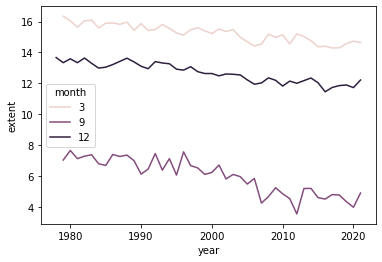

In [8]:
_ = sns.lineplot(x="year", y="extent", data=months, hue="month")

1.3

In [9]:
# make s copy of sep data and set years relative to 2000
month_sep = months[months["month"] == 9]
month_sep_copy = month_sep.copy()
month_sep_copy["year"] = month_sep_copy["year"] - 2000

In [10]:
extent = smf.ols("extent ~ year", data=month_sep_copy).fit()
extent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 extent   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     157.5
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           1.25e-15
Time:                        09:13:31   Log-Likelihood:                -32.417
No. Observations:                  43   AIC:                             68.83
Df Residuals:                      41   BIC:                             72.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9935      0.080     74.629      0.000       5.831       6.156
year          -0.0812      0.006    -12.551      0.000      -0.094      -0.068
==============================================================================
Omnibus:                        2.573   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.525
Skew:                          -0.324   Prob(JB):                        0.467
Kurtosis:                       3.656   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The estimated function is y = -0.0812x + 5.9935 where x is the year of sep data and y is the sea ice extent

1.4

the coefficient of year means that every year the sea ice area would decrease by 0.0812 M km^2. (This is also the slope)

the intercept means that the sea ice extent area is 5.9935 M km^2 in the year 2000. 

It is statiscally significant since the p value is 0 for both the intercept and year 

1.5**

(a)

(b): It means that there is a reference year(year 2000, and like I said ealier the intercept means that the sea ice extent area is 5.9935 M km^2 in the year 2000

1.6

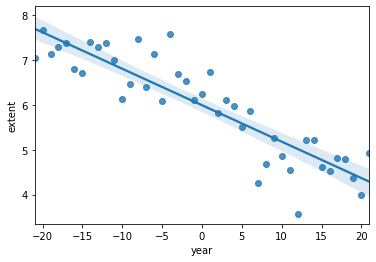

In [11]:
# compute a linear regression line
ax = sns.regplot(x="year", y="extent", data=month_sep_copy)

There is a very clear decreasing trend for the ice extent area as year goes by. There are some noticeable acceleration between year 1995 and year 2010. Just like that 2010 - 2020 slows down a bit which is a deceleration here.

1.7

When we have BOE, the extent hits 0, which means y = 0. So -0.0812x + 5.9935 = 0 Therefore x = 73.8115764 which indicates BOE will arrive during the year of 2073.

1.8

In [12]:
month_mar = months[months["month"] == 3]
month_mar_copy = month_mar.copy()
month_mar_copy["year"] = month_mar_copy["year"] - 2000

In [13]:
extent = smf.ols("extent ~ year", data=month_mar_copy).fit()
extent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 extent   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     160.8
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           8.96e-16
Time:                        09:13:35   Log-Likelihood:                -1.3365
No. Observations:                  43   AIC:                             6.673
Df Residuals:                      41   BIC:                             10.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.2570      0.039    391.380      0.000      15.178      15.336
year          -0.0398      0.003    -12.679      0.000      -0.046      -0.033
==============================================================================
Omnibus:                        3.903   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                2.534
Skew:                          -0.403   Prob(JB):                        0.282
Kurtosis:                       2.125   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

this gives us the function y = -0.0398x + 15.2570; since we want to know when will the Arctic be completely ice free

0 = -0.0398x + 15.2570 -> x = 383.341709. Year 2383 will be the year where the Arctic will be completely ice free

## 2 How is basketball game score calculated

2.1

In [14]:
basketball = pd.read_csv("../data/harden-18-19.csv.bz2")
basketball.head(5)

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2018-10-17,29-052,HOU,NaN,NOP,L (-19),1,34:43,...,7,9,10,3,1,4,2,18,18.9,-23
1,2,2.0,2018-10-20,29-055,HOU,@,LAL,W (+9),1,37:50,...,6,7,5,2,1,6,2,36,27.0,-3
2,3,3.0,2018-10-21,29-056,HOU,@,LAC,L (-3),1,39:45,...,4,4,14,2,0,3,1,31,26.4,+5
3,4,4.0,2018-10-24,29-059,HOU,NaN,UTA,L (-11),1,31:38,...,4,5,7,1,0,7,4,29,17.7,-5
4,5,NaN,2018-10-26,29-061,HOU,NaN,LAC,L (-20),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive


In [15]:
basketball.shape

(82, 30)

2.2

In [16]:
print(basketball.Date.min())
print(basketball.Date.max())

2018-10-17
2019-04-09


In [17]:
active = basketball[basketball["GmSc"] != "Inactive"]
active.shape

(78, 30)

In [18]:
Played = basketball.G.dropna()
Played.shape

(78,)

Harden played 78 games

2.3

In [19]:
gmSc_numeric = pd.to_numeric(active.GmSc)
FGA_numeric = pd.to_numeric(active.FGA)
FG_numeric = pd.to_numeric(active.FG)

2.4

In [20]:
gmSc_numeric.describe()
# GmSc: 
# mean is 26.708974
# std is  10.053883

count    78.000000
mean     26.708974
std      10.053883
min       1.200000
25%      21.225000
50%      25.800000
75%      32.150000
max      52.200000
Name: GmSc, dtype: float64

In [21]:
# GmSc's range is 51.0
diff = gmSc_numeric.max() - gmSc_numeric.min()
diff

51.0

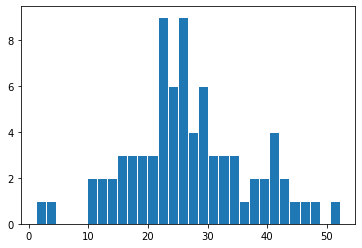

In [22]:
# There is a normal distribution for the game score
_ = plt.hist(gmSc_numeric, edgecolor="w", bins=30)


2.5**

In [23]:
data = pd.concat([gmSc_numeric, FGA_numeric], axis=1)
reg = smf.ols("gmSc_numeric ~ FGA_numeric", data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gmSc_numeric   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     13.54
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           0.000433
Time:                        09:13:39   Log-Likelihood:                -283.80
No. Observations:                  78   AIC:                             571.6
Df Residuals:                      76   BIC:                             576.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.5963      4.240      2.735      0.008       3.152      20.041
FGA_numeric     0.6175      0.168      3.680      0.000       0.283       0.952
==============================================================================
Omnibus:                        0.602   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.740   Jarque-Bera (JB):                0.739
Skew:                          -0.137   Prob(JB):                        0.691
Kurtosis:                       2.609   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(a): when FGA(field goal attempts) is 0, the game score is 11.5963

(b): if there is one unite increase on FGA(field goal attempts), the game score will go up 0.6175. It is statistically significant since the p value is 0


2.6**

In [24]:
data = pd.concat([gmSc_numeric, FGA_numeric, FG_numeric], axis=1)
reg = smf.ols("gmSc_numeric ~ FGA_numeric + FG_numeric", data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gmSc_numeric   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     50.42
Date:                Sun, 20 Feb 2022   Prob (F-statistic):           1.33e-14
Time:                        09:13:40   Log-Likelihood:                -256.97
No. Observations:                  78   AIC:                             519.9
Df Residuals:                      75   BIC:                             527.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.8608      3.075      2.231      0.029       0.735      12.987
FGA_numeric    -0.6940      0.194     -3.584      0.001      -1.080      -0.308
FG_numeric      3.4082      0.396      8.616      0.000       2.620       4.196
==============================================================================
Omnibus:                        2.958   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.228   Jarque-Bera (JB):                1.904
Skew:                           0.154   Prob(JB):                        0.386
Kurtosis:                       2.299   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(a): 
 if there is one unite increase on FGA(field goal attempts), the game score will go down 0.6175 (holding other constants unchanged). Yes it is statistically sgnificant beacuse the p value is very small (close to 0)

(b):
 if there is one unite increase on FG(field goal), the game score will go up 3.4082 (holding other constants unchanged). Yes it is statistically sgnificant beacuse the p value is 0

(c):
"Game score" is a measure of player's performance. It is not the same thing as the points a team gets.  The teams' points cannot go down, but players performance measure can go up and down, depending on what they do. That's why we can see the changes on FGA. 

(d): 


2.7

In [48]:
active = active[["FG", "FGA","3P","3PA","FT","FTA","ORB",
                 "DRB","AST","STL","BLK","TOV","PF","GmSc"]].apply(pd.to_numeric)
active_new = active.rename(columns={'3P':'ThreeP', '3PA':'ThreePA'})

reg = smf.ols("GmSc ~ FGA + FG + ThreeP + ThreePA + FT + FTA + ORB + DRB + AST + STL + BLK + TOV + PF", active_new).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.327e+28
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:26:44   Log-Likelihood:                 2208.9
No. Observations:                  78   AIC:                            -4390.
Df Residuals:                      64   BIC:                            -4357.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.132e-14    9.5e-14      0.224      0.823   -1.69e-13    2.11e-13
FGA           -0.7000   6.66e-15  -1.05e+14      0.000      -0.700      -0.700
FG             2.4000   1.15e-14   2.08e+14      0.000       2.400       2.400
ThreeP         1.0000   1.28e-14   7.79e+13      0.000       1.000       1.000
ThreePA    -1.998e-15   8.68e-15     -0.230      0.819   -1.93e-14    1.53e-14
FT             1.4000   1.51e-14   9.24e+13      0.000       1.400       1.400
FTA           -0.4000   1.37e-14  -2.92e+13      0.000      -0.400      -0.400
ORB            0.7000   1.77e-14   3.95e+13      0.000       0.700       0.700
DRB            0.3000   6.64e-15   4.52e+13      0.000       0.300       0.300
AST            0.7000   4.96e-15   1.41e+14      0.000       0.700       0.700
STL            1.0000   1.13e-14   8.85e+13      0.000       1.000       1.000
BLK            0.7000   2.06e-14    3.4e+13      0.000       0.700       0.700
TOV           -1.0000   8.38e-15  -1.19e+14      0.000      -1.000      -1.000
PF            -0.4000   1.27e-14  -3.15e+13      0.000      -0.400      -0.400
==============================================================================
Omnibus:                       11.719   Durbin-Watson:                   0.062
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                3.512
Skew:                           0.016   Prob(JB):                        0.173
Kurtosis:                       1.961   Cond. No.                         228.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(a):
Both the stds and t-vlaues are very small in this model

(b):

(c):


2.8

Yes! I did recover the same formula

## 3 Interpret regression results in the literature

3.1

According to the regression table, people who have a partner do have better mental health. However, this effect is not statistically significant since the p-value is quite large (0.150)

3.2

According to the regression table, people who COVID exposure do not have better mental health. It is worsen the mental health. However, this effect is not statistically significant since the p-value is quite large (0.129)

3.3

According to the regression table, financial distress and mental health has a postive relationship. That means that, when there is more financial distress, the mental health will be worsening. This effect is statistically significant becasue the p-value is very small (< 0.001).

## Total hours: 15 hours 